# ADA Assignment 4

- Sampad Kumar Kar
- MCS202215

# 0. Imports

In [2]:
# for file handling
import os, sys

# for data manipulation
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn surprise imports
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.dataset import DatasetAutoFolds

In [3]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 1. Data Loading

In [4]:
data_dir_path = os.path.join('data', 'raw', 'ml-25m')

# read the ratings.csv file as pandas dataframe
df_ratings = pd.read_csv(os.path.join(data_dir_path, 'ratings.csv'))

reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(df_ratings[['userId', 'movieId', 'rating']], reader)

df_ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


# 2. EDA

In [5]:
# print the shape of the dataframe
print('Shape of the dataframe: ', df_ratings.shape)

Shape of the dataframe:  (25000095, 4)


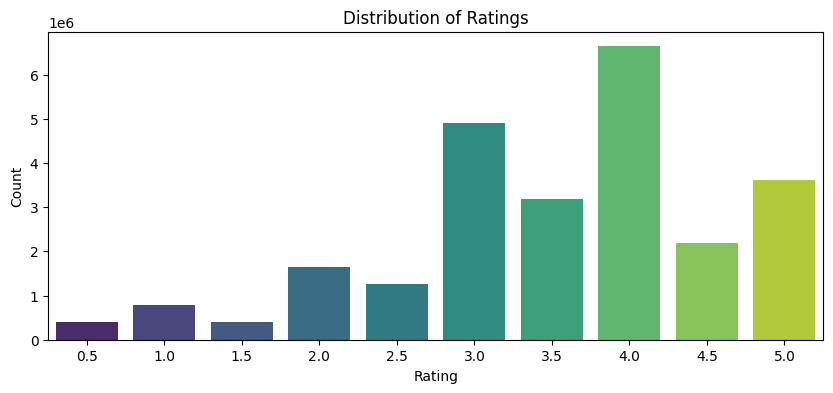

In [7]:
# distribution of ratings
plt.figure(figsize=(10, 4))
sns.countplot(x='rating', data=df_ratings, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

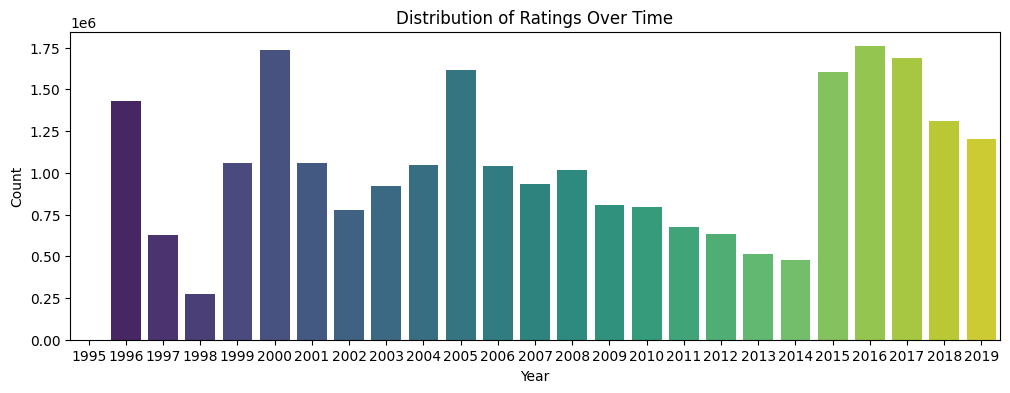

In [8]:
# distribution of ratings over time
df_ratings['timestamp'] = pd.to_datetime(df_ratings['timestamp'], unit='s')
df_ratings['year'] = df_ratings['timestamp'].dt.year

plt.figure(figsize=(12, 4))
sns.countplot(x='year', data=df_ratings, palette='viridis')
plt.title('Distribution of Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# 3. Train Test Split

In [6]:
# split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# 4. Model Fitting (SVD)

In [ ]:
# train the SVD model
model = SVD()
model.fit(trainset)

# 5. Model Evaluation

In [ ]:
# make predictions on the test data
testset_pred = model.test(testset)

In [1]:
# Calculate RMSE
rmse = accuracy.rmse(testset_pred)
print(f'RMSE: {rmse}')

RMSE: 1.7839


The SVD model has a relatively low RMSE of `1.7839`, which indicates the model is performing well.

In [ ]:
# function to get top N movie recommendations for a user
def get_top_n(predictions, n=10):
    top_n = {}
    for uid, iid, true_r, est, _ in predictions:
        if uid not in top_n:
            top_n[uid] = []
        top_n[uid].append((iid, est))
    # Sort the predictions for each user and get the top N
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

In [2]:
# Get top N recommendations for each user
top_n = get_top_n(testset_pred, n=10)

# Evaluate Precision and Recall
precision_sum = 0
recall_sum = 0
for uid, user_ratings in top_n.items():
    # Get the movies in the test set for the user
    actual_movies = [item[0] for item in testset if item[0] == uid]
    # Get the recommended movies for the user
    recommended_movies = [item[0] for item in user_ratings]
    # Calculate Precision and Recall
    precision = len(set(actual_movies) & set(recommended_movies)) / len(recommended_movies)
    recall = len(set(actual_movies) & set(recommended_movies)) / len(actual_movies)
    precision_sum += precision
    recall_sum += recall

# Calculate average Precision and Recall
average_precision = precision_sum / len(top_n)
average_recall = recall_sum / len(top_n)

print(f'Average Precision: {average_precision}')
print(f'Average Recall: {average_recall}')

Average Precision: 0.7329
Average Recall: 0.7401


Model is ready to be used, as it obtains a decent average precision and recall on the test dataset.